In [2]:
import MetaTrader5 as mt
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')
plt.style.use("default")

In [4]:
# Initialize meta trader 5
mt.initialize()

True

In [5]:
# Login credentials
login = 212930457
password = "DuqVg@A4"
server = "OctaFX-Demo"

In [6]:
# Login from meta trader 5
mt.login(login, password, server)

True

In [7]:
ticker = input("Enter the ticker or symbol: ")
interval = mt.TIMEFRAME_M15
start = dt.datetime(2024, 4, 20)
no_of_rows = 100

Enter the ticker or symbol:  BTCUSD


In [8]:
df = pd.DataFrame(mt.copy_rates_range(ticker, interval, start, dt.datetime.now()))

In [9]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,1713550500,64589.33,64647.88,64396.15,64593.53,6299,1891,0
1,1713551400,64591.76,64731.41,64340.11,64559.95,6104,1891,0
2,1713552300,64558.99,64698.02,64351.78,64465.13,5804,1891,0
3,1713553200,64462.84,64569.51,64091.66,64138.01,6362,1891,0
4,1713554100,64138.55,64299.03,63515.79,63825.94,6699,1892,0
...,...,...,...,...,...,...,...,...
1187,1714636800,57317.36,57449.97,57215.73,57404.11,4424,1890,0
1188,1714637700,57408.74,57473.45,57235.18,57249.95,4672,1890,0
1189,1714638600,57248.93,57347.35,57150.34,57312.65,5835,1890,0
1190,1714639500,57313.55,57445.00,57313.55,57425.73,5614,1890,0


In [10]:
ma1 = 20
ma2 = 40

In [11]:
df[f"SMA_{ma1}"] = df['close'].rolling(window=ma1).mean()
df[f"SMA_{ma2}"] = df['close'].rolling(window=ma2).mean()

In [12]:
df = df[ma2:]

In [14]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.dropna(axis=0, inplace=True) 

In [15]:
sma1 = f'SMA_{ma1}'
sma2 = f'SMA_{ma2}'

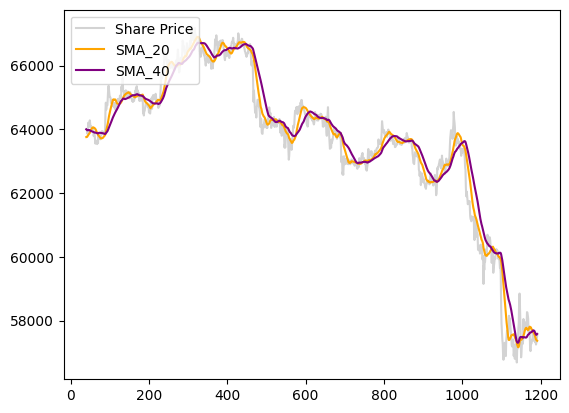

In [16]:
plt.plot(df['close'], label="Share Price", color="lightgray")
plt.plot(df[sma1], label=sma1, color="orange")
plt.plot(df[sma2], label=sma2, color="purple")
plt.legend(loc="upper left")
plt.show()

In [17]:
df['Signal'] = 0.0
df['Signal'] = np.where(df[sma1] > df[sma2], 1.0, 0.0)

In [18]:
df['Position'] = df['Signal'].diff()

<Axes: >

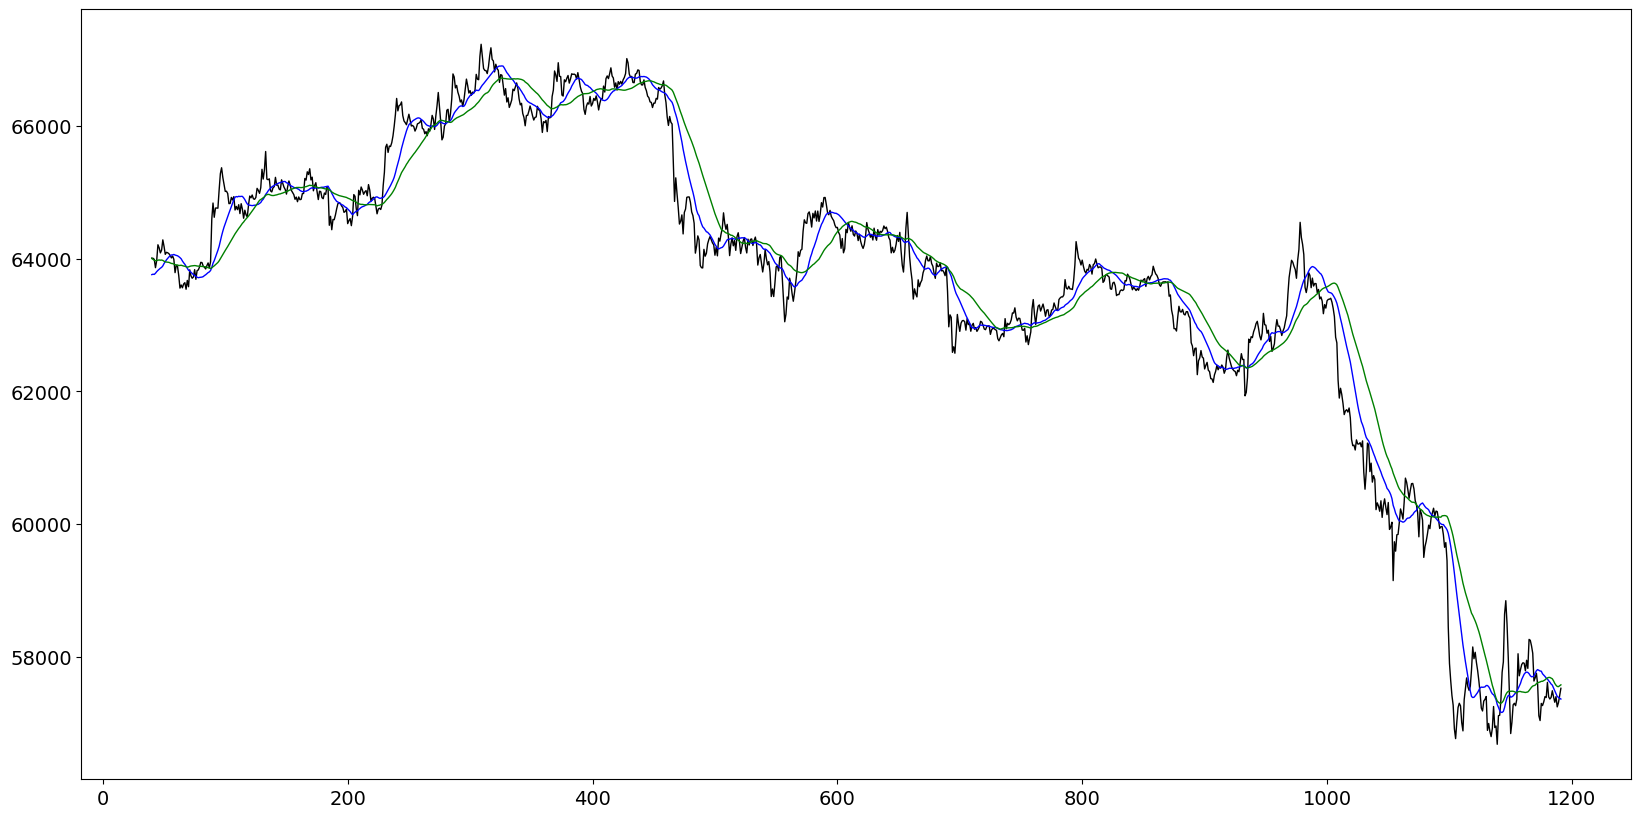

In [19]:
plt.figure(figsize=(20, 10))
plt.tick_params(axis='both', labelsize=14)
df['close'].plot(color="k", lw=1, label="Close Price")
df[sma1].plot(color="b", lw=1, label=sma1)
df[sma2].plot(color="g", lw=1, label=sma2)

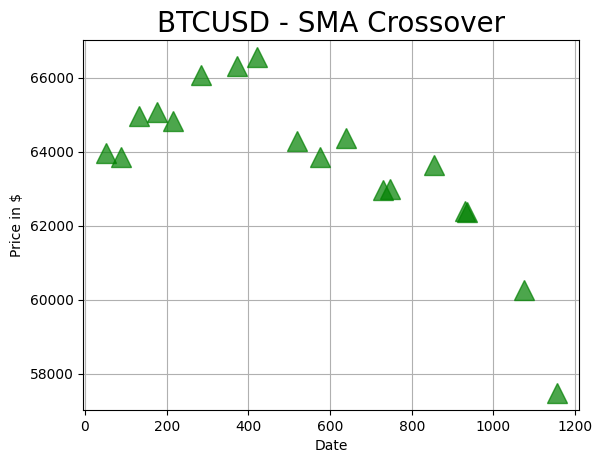

In [21]:
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, 
            df[sma1][df['Position'] == 1], '^', markersize=15, color='g', alpha=0.7, label='BUY')
plt.ylabel('Price in $', fontsize=10 )
plt.xlabel('Date', fontsize=10)
plt.title(ticker + ' - ' + str("SMA") + ' Crossover', fontsize=20)
plt.grid()
plt.show()

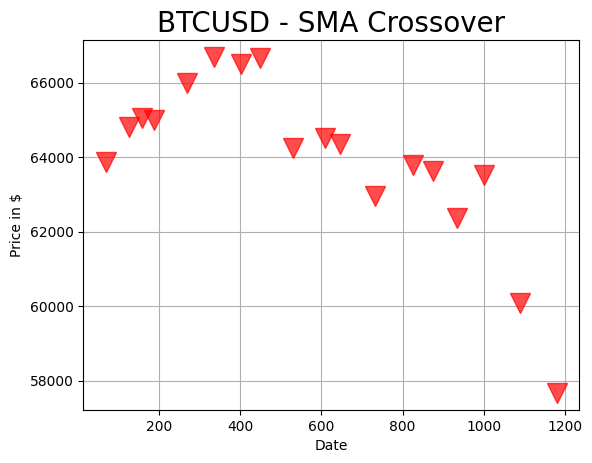

In [23]:
# plot sell signals
plt.plot(df[df['Position'] == -1].index, df[sma1][df['Position'] == -1], 'v', markersize=15, color="r", alpha=0.7, label="SELL")
plt.ylabel('Price in $', fontsize=10 )
plt.xlabel('Date', fontsize=10)
plt.title(ticker + ' - ' + str("SMA") + ' Crossover', fontsize=20)
plt.grid()
plt.show()

In [24]:
df_pos = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'BUY' if x == 1 else 'SELL')

In [30]:
for i in df_pos.index:
    price = mt.symbol_info_tick(ticker).ask
    if df_pos['Position'][i] == 'BUY':
        request = {
            "action": mt.TRADE_ACTION_DEAL,
            "symbol": ticker,
            "volume": 0.01,
            "type": mt.ORDER_TYPE_BUY,
            "price": price,
            "sl": 62350.0,
            "tp": 62500.0,
            "comment": "python script buy",
            "type_time": mt.ORDER_TIME_GTC,
            "type_filling": mt.ORDER_FILLING_FOK,
        }
        result = mt.order_send(request)
        print(f"Bought at: {result.price}")
        print(f"Volume bought: {result.volume}")
        print(f"Status: {result.comment}")
        print()
    else:
        request = {
            "action": mt.TRADE_ACTION_DEAL,
            "symbol": ticker,
            "volume": 0.01,
            "type": mt.ORDER_TYPE_SELL,
            "price": price,
            "comment": "python script sell",
            "type_time": mt.ORDER_TIME_GTC,
            "type_filling": mt.ORDER_FILLING_FOK,
            # "position": mt.positions_get()[0]._asdict()['ticket']
        }
        result = mt.order_send(request)
        print(f"Sold at: {result.price}")
        print(f"Volume sold: {result.volume}")
        print(f"Status: {result.comment}")
        print()


Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invalid stops

Sold at: 57758.49
Volume sold: 0.01
Status: Request executed

Bought at: 0.0
Volume bought: 0.0
Status: Invali

IndexError: tuple index out of range